## Exercise 2
In the course you learned how to do classification using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

Epoch 1/10
60000/60000 [==============================] - 10s 159us/sample - loss: 0.2007 - acc: 0.9406
Epoch 2/10
60000/60000 [==============================] - 9s 156us/sample - loss: 0.0797 - acc: 0.9759
Epoch 3/10
60000/60000 [==============================] - 9s 157us/sample - loss: 0.0521 - acc: 0.9840
Epoch 4/10
60000/60000 [==============================] - 9s 151us/sample - loss: 0.0373 - acc: 0.9883
Epoch 5/10
59744/60000 [============================>.] - ETA: 0s - loss: 0.0275 - acc: 0.9914


 Reached 99% accuracy so cancelling training!



10000/10000 [==============================] - 1s 70us/sample - loss: 0.0658 - acc: 0.9812


[0.06582891521557759, 0.9812]

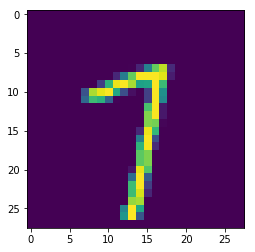

In [12]:
#Rishab Verma - 8th July 2019

import tensorflow as tf
import matplotlib.pyplot as plt 

# YOUR CODE SHOULD START HERE
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.99):
      print('\n\n\n Reached 99% accuracy so cancelling training!\n\n\n')
      self.model.stop_training = True
# YOUR CODE SHOULD END HERE





#stop when reached 99% accuracy



mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

plt.imshow(x_train[42])
#print(y_train[42])
#print(x_train[42])

stoop = myCallback()
# YOUR CODE SHOULD END HERE
model = tf.keras.models.Sequential([
# YOUR CODE SHOULD START HERE
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
# YOUR CODE SHOULD END HERE
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# YOUR CODE SHOULD START HERE
model.fit(x_train, y_train, epochs=10, callbacks=[stoop])
model.evaluate(x_test, y_test)

# YOUR CODE SHOULD END HERE